# Telecom Churn Analysis

In [168]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,7)

In [169]:
df=pd.read_csv("Python_Case_Studytop.csv")

In [170]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Description of Columns

• State: US state in which the customer resides

• Account length: The number of days that this account has been active

• Area code: The three-digit area code of the corresponding customer’s phone number

• International plan: Customer has an international calling plan: YES / NO

• Voice mail plan: Customer has a voice mail feature: YES / NO

• Number vmail messages: average number of voice mail messages per month

• Total day minutes: total number of calling minutes used during the day

• Total day calls: total number of calls placed during the day

• Total day charge: billed cost of daytime calls

• Total eve minutes: total number of calling minutes used during the evening

• Total eve calls: total number of calls placed during the evening

• Total eve charge: billed cost of evening time calls

• Total night minutes: total number of calling minutes used during the night

• Total night calls: the total number of calls placed during the night

• Total night charge: the billed cost of nighttime calls

• Total intl minutes: total number of international minutes

• Total intl calls: total number of international calls

• Total intl charge: billed cost for international calls

• Customer service calls: number of calls placed to Customer Service

• Churn: whether the customer left the service: True/False

In [171]:
df.shape

(2666, 20)

# Information About Dataset

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [173]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# Basic Statistics of Data

In [174]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Checking for Null Values

In [175]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<AxesSubplot:xlabel='International plan', ylabel='count'>

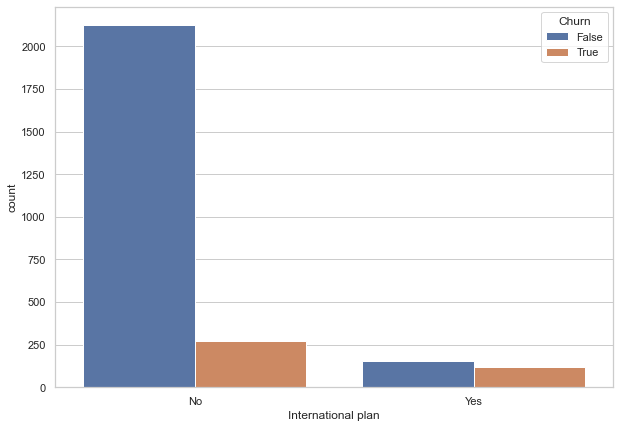

In [176]:
sns.countplot(df["International plan"],hue="Churn",data=df)

# Top 10 States Who Left the Sevices

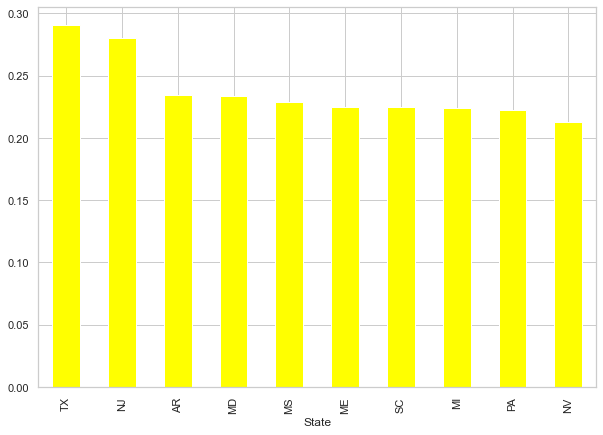

In [177]:
(df.groupby(['State'])['Churn'].mean()).nlargest(10).plot(kind='bar',color='yellow');

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

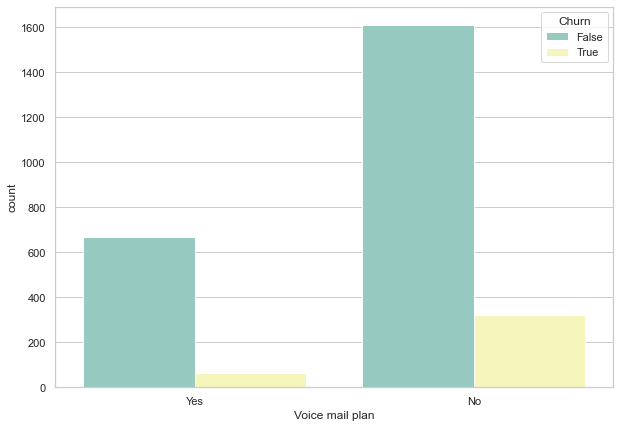

In [178]:
sns.countplot(df["Voice mail plan"],hue="Churn",data=df,palette='Set3')

<AxesSubplot:ylabel='Churn'>

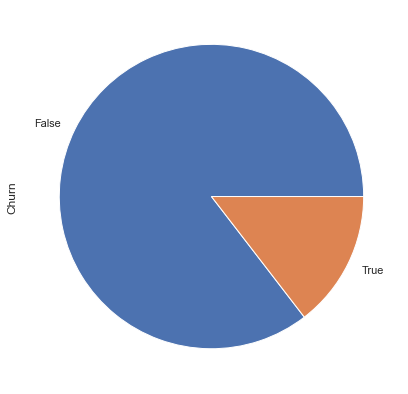

In [179]:
df.Churn.value_counts().plot(kind="pie")

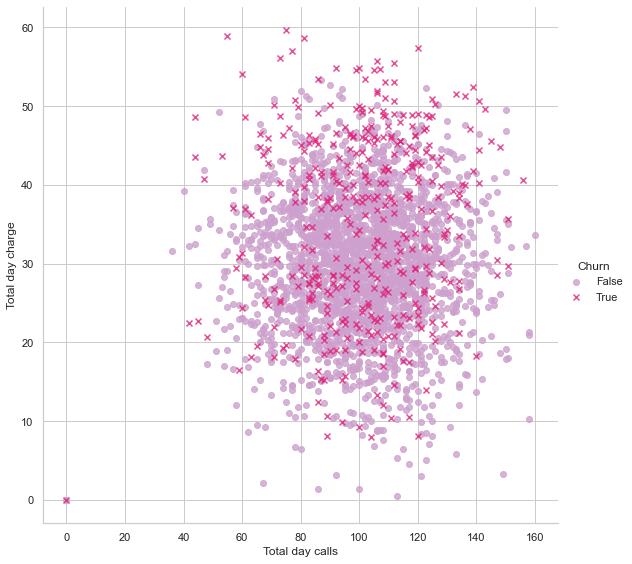

In [180]:
sns.lmplot("Total day calls", "Total day charge", data = df, hue='Churn', fit_reg=False,palette='PuRd',markers=['o','x'],size=8);

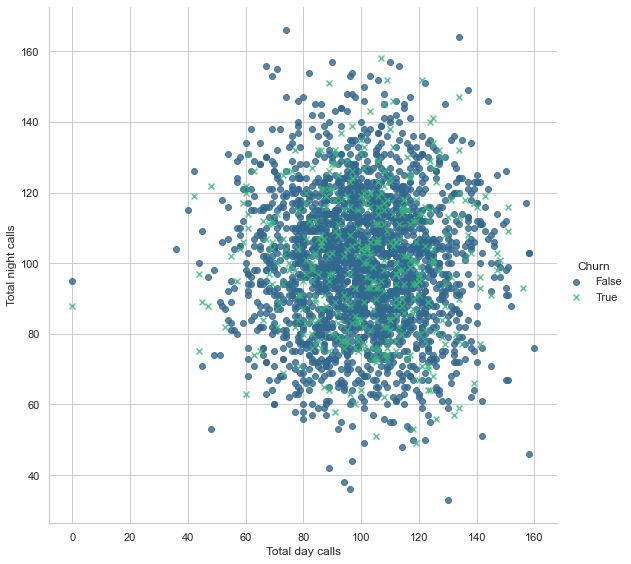

In [181]:
sns.lmplot('Total day calls', 'Total night calls', data = df, hue='Churn', fit_reg=False,palette='viridis',markers=['o','x'],size=8);

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

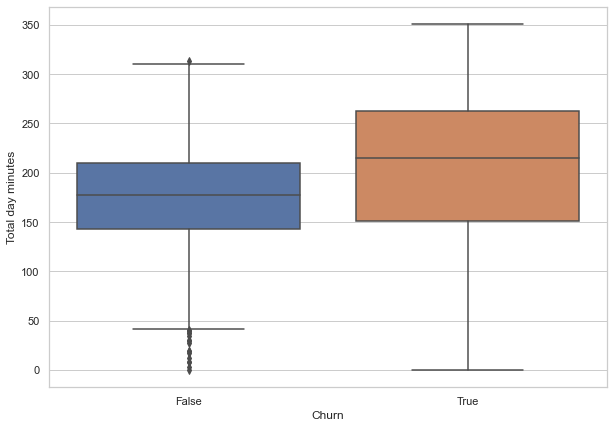

In [182]:
sns.boxplot( x=df["Churn"], y=df["Total day minutes"] )

<AxesSubplot:xlabel='Churn', ylabel='Total day charge'>

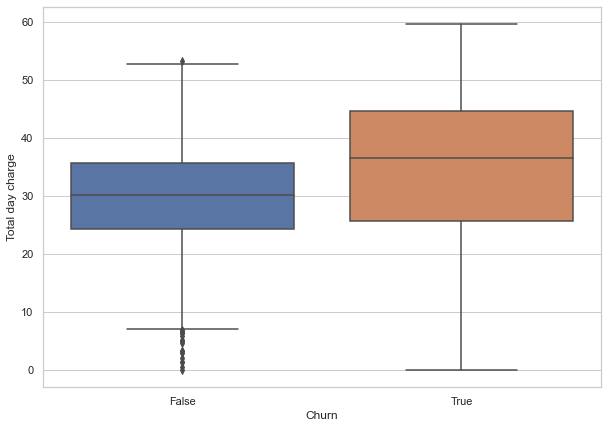

In [183]:
sns.boxplot( x=df["Churn"], y=df["Total day charge"] )

# Plotting Historams for All the Columns

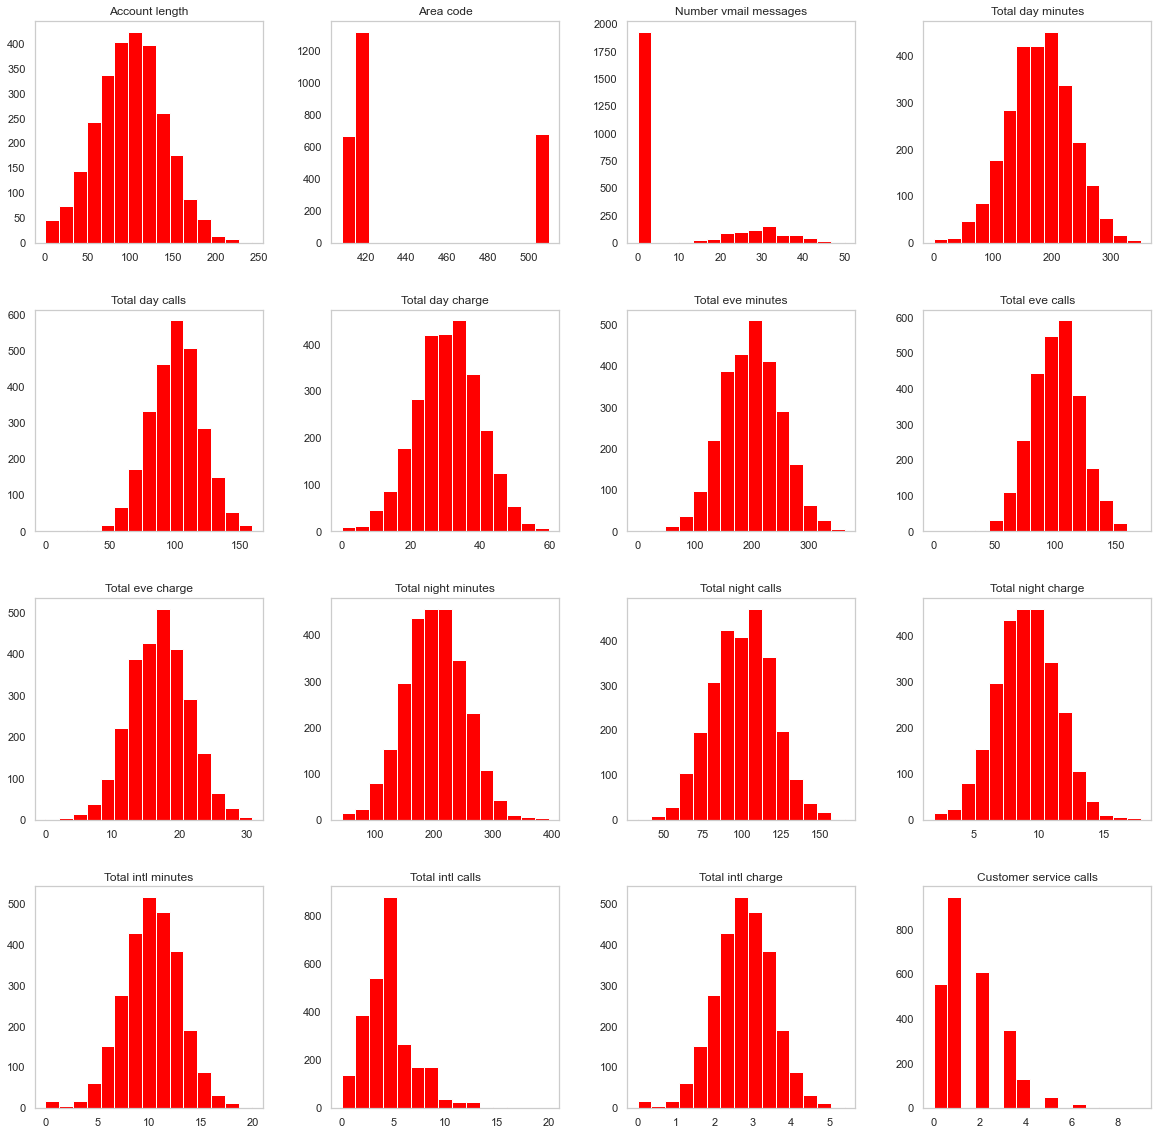

In [184]:
df.hist(figsize=(20,20),grid=False,color='red',bins=15);

# Counts of Customes Having International Plans & Voice Mail Plan

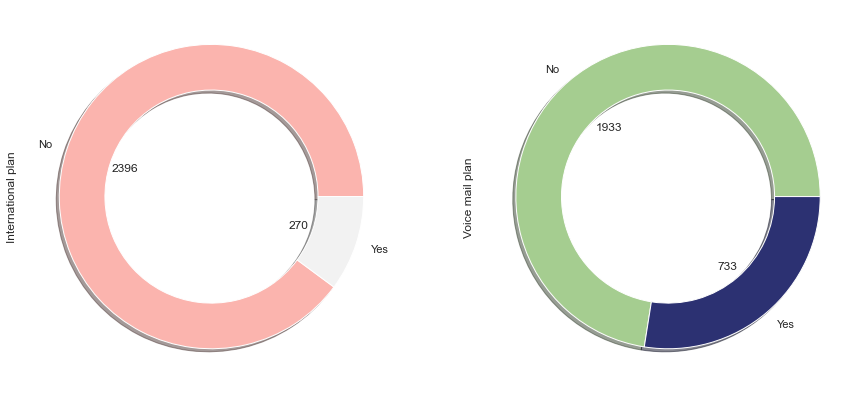

In [185]:
f,axes=plt.subplots(1,2,figsize=(15,8))
df["International plan"].value_counts().plot(kind='pie',autopct=lambda
                    p : '{:.0f}'.format(p * (df['International plan'].count()) / 100),wedgeprops=dict(width=.30),
                                             cmap='Pastel1',shadow=True,ax=axes[0])

df['Voice mail plan'].value_counts().plot(kind='pie',autopct=lambda
                                          p : '{:.0f}'.format(p * (df['Voice mail plan'].count()) / 100),shadow=True,
                                          wedgeprops=dict(width=.30),cmap='crest',ax=axes[1]);

# Count of Customer Who Purchased International Plajn / Voice mail Plan with Respect to Churn

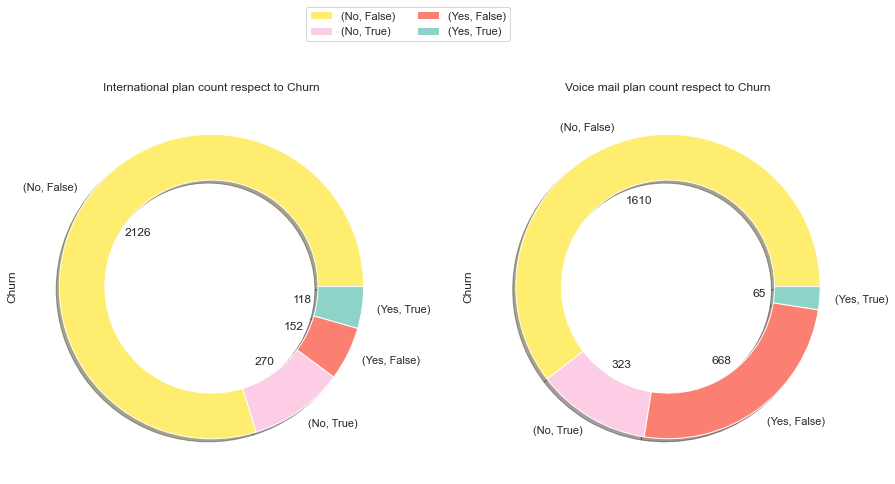

In [186]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('International plan count respect to Churn')
df.groupby('International plan')['Churn'].value_counts().plot(kind='pie', autopct=lambda
                                     p : '{:.0f}'.format(p * (df['International plan'].count()) / 100), cmap='Set3_r',
                                       wedgeprops=dict(width=.3), shadow=True)

plt.legend(bbox_to_anchor=(1.3,1.25), ncol=2)

plt.subplot(1,2,2)
plt.title('Voice mail plan count respect to Churn')
df.groupby('Voice mail plan')['Churn'].value_counts().plot(kind='pie' ,autopct=lambda
                                        p : '{:.0f}'.format(p * (df['Voice mail plan'].count()) / 100), cmap='Set3_r',
                                              wedgeprops=dict(width=.3), shadow=True);

In [187]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [188]:
df["Churn"] = le.fit_transform(df["Churn"])
df["International plan"] = le.fit_transform(df["International plan"])
df["Voice mail plan"] = le.fit_transform(df["Voice mail plan"])
df["State"] = le.fit_transform(df["State"])
df["Area code"] = le.fit_transform(df["Area code"])

In [189]:
df['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

# Correlation By Heatmap

<AxesSubplot:>

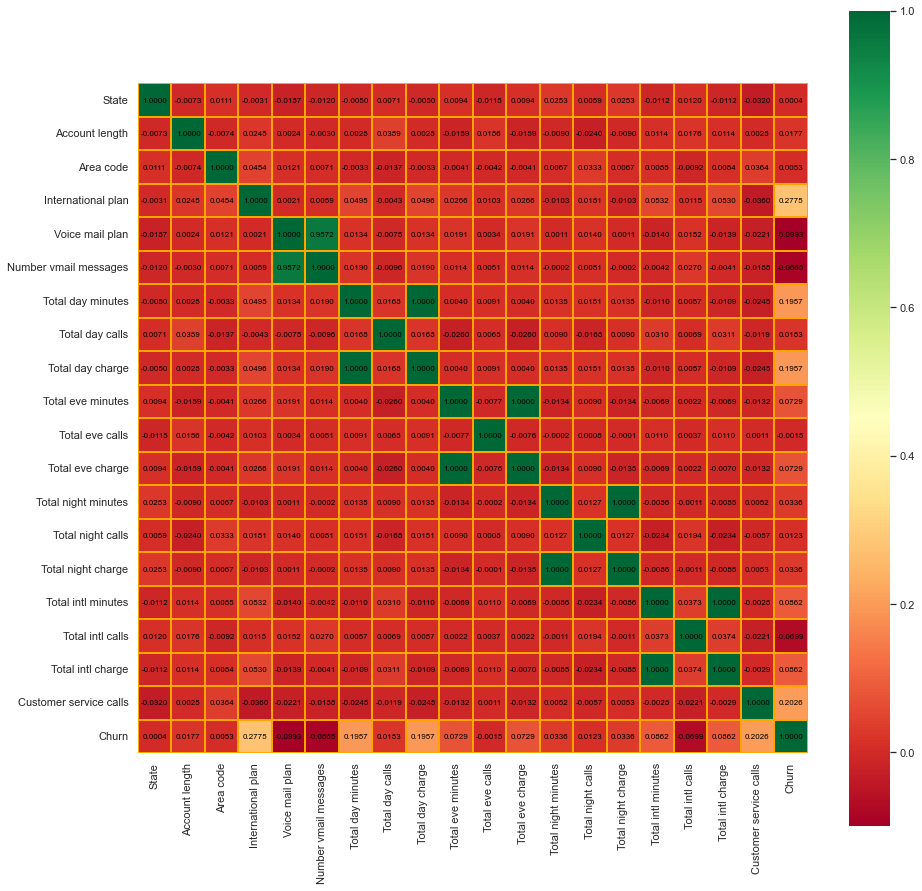

In [190]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

In [191]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [192]:
df["Area code"].unique()

array([1, 0, 2], dtype=int64)

In [193]:
X=df.drop(["Churn"], axis = 1)
y=df.Churn

In [194]:
X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [195]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [196]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [197]:
print(selection.feature_importances_)

[0.01947868 0.0205458  0.01628102 0.0780892  0.03838382 0.01366079
 0.12201028 0.02234203 0.12336997 0.06409409 0.01985241 0.06587447
 0.03259649 0.02213298 0.03251365 0.04627013 0.08746804 0.04911759
 0.12591857]


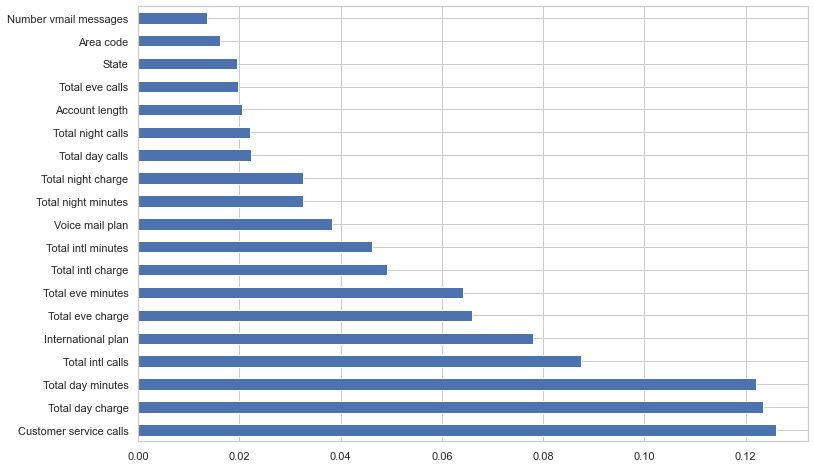

In [198]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [200]:
X_train.shape 

(2132, 19)

In [201]:
X_test.shape

(534, 19)

In [202]:
y_train

1855    0
2244    0
2525    1
961     0
1618    0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: Churn, Length: 2132, dtype: int64

In [203]:
y_test

2087    1
1915    0
479     0
1898    1
741     1
       ..
1196    0
958     0
861     0
1510    0
1992    1
Name: Churn, Length: 534, dtype: int64

In [204]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score

In [205]:
from sklearn.model_selection import KFold,cross_val_score

In [206]:
models=[]
models.append(('LogisticRegression',LogisticRegression())),
models.append(('SGDC',SGDClassifier())),
models.append(('DecisionTree',DecisionTreeClassifier())),
models.append(('RandomForest',RandomForestClassifier())),
models.append(('GradientBoost',GradientBoostingClassifier())),
models.append(('KNN',KNeighborsClassifier())),
models.append(('SVM',SVC())),
models.append(('AdaBoost',AdaBoostClassifier())),
models.append(('Naive Bayes',GaussianNB())),
models.append(('LinearDiscriminant',LinearDiscriminantAnalysis())),
models.append(('QuadraticDiscriminant',QuadraticDiscriminantAnalysis())),

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LogisticRegression 0.8484972138124698
SGDC 0.7362752841033742
DecisionTree 0.9099469088675354
RandomForest 0.9512197797376156
GradientBoost 0.9526260365933922
KNN 0.8738251941555877
SVM 0.8550568206748279
AdaBoost 0.8672568118994339
Naive Bayes 0.8653613268395419
LinearDiscriminant 0.8555087534553113
QuadraticDiscriminant 0.869586678952218


In [207]:
from sklearn.ensemble import RandomForestClassifier
model_rc = RandomForestClassifier()
model_rc.fit(X_train,y_train)

RandomForestClassifier()

In [208]:
model_rc.score(X_train,y_train)

0.9995309568480301

In [209]:
model_rc.score(X_test,y_test)

0.9456928838951311

In [210]:
y_pred = model_rc.predict(X_test)

In [211]:
print(' accuracy score:---->', {model_rc.score(X_test,y_test)})
print(' precision score:---->', {precision_score(y_test,y_pred)})
print(' recall score:---->', {recall_score(y_test,y_pred)})


 accuracy score:----> {0.9456928838951311}
 precision score:----> {0.9807692307692307}
 recall score:----> {0.6455696202531646}


In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       455
           1       0.98      0.65      0.78        79

    accuracy                           0.95       534
   macro avg       0.96      0.82      0.87       534
weighted avg       0.95      0.95      0.94       534

